# Introduction to Clustering

The field of Machine Learning is broadly categorized into **_4_** main approaches, as illustrated below.

---

$
\text{🤖 Machine Learning}
\begin{cases}
  \text{🧑‍🏫 Supervised Learning} \\
  \text{🧩 Unsupervised Learning} \\
  \text{⚖️ Semi-supervised Learning} \\
  \text{🕹️ Reinforcement Learning}
\end{cases}
$

---

This report will focus on **Clustering**, one of the primary tasks within the **'Unsupervised Learning'**.

In many machine learning tasks, particularly in **'Supervised Learning'**, the primary goal is a prediction. An algorithm is trained on labeled data to predict an output, such as assigning a label to new, unseen data.

From the other hand, **'Clustering'** is not designed to predict a specific output. Instead, its objective is to discover structures within the data by organizing it into meaningful groups, or "clusters."

---

# A real world example

## Bank Example: Finding Risky Customers

Banks use clustering to figure out which customers are financially similar and what risk they pose.

*   **Goal:** Group customers to manage financial risk.
*   **Input:** The bank uses unlabeled financial data like a customers income, debt, and payment history, age and ....
*   **Clustering Action:** The algorithm automatically sorts all customers into distinct groups, such as a **"Low-Risk"** cluster and a **"High-Risk"** cluster.
*   **Impact:** The bank can then use these groups to make decisions. For example, they can offer their best interest rates and products to the Low-Risk group while restricting loans or services to the High-Risk group.

---

## Where to use clustering

*   **Exploring data analysis**
*   **Summary generation**
*   **Outlier detection**
*   **Finding duplicates**
*   **Pre-processing data**

---

Now that you know the main idea about clustering, let's dive into the scientiffic parts.

For all algorithms in clustering, we actually want to find similarities and dissimilarities.

You might wonder why we need dissimilarities! Well the answer is straightforward. As you can see in the image below, we are trying to cluster similar items that are as close as possible together. From the other hand, we are trying to maximize the clusters distances from each other. Look at the image below to see it clearly:

---

![](assets/intra_inter.png)

---

As you can see, the yellow items are trying to stick together and stay close, but the green and bule ones are trying to get as far as possible! If we somehowe manage to maximize the **'intra-distances'** and also minimize **'inter-distances'**, we can claim that we are on the right track in clustering.

So, the goals are:

$$\text{Dis} (x_1, x_2) \downarrow$$
*(Minimize the distance between points $\mathbf{x_1}$ and $\mathbf{x_2}$ in the same cluster)*

$$\text{Dis} (c_1, c_2) \uparrow$$
*(Maximize the distance between clusters $\mathbf{c_1}$ and $\mathbf{c_2}$)*

---

### What is distance and how to measure that?

Well, there are many different ways to measure distances between 2 points in vector environment such as :

*   **Euclidean**
*   **Cosine**
*   **Average distance**

and ...

For now, we are going to talk about '**Euclidean**'

In mathematics, the Euclidean distance between two points in Euclidean space is the length of the line segment between them. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, and therefore is occasionally called the Pythagorean distance.

You can see it clearly in the image below:

---

![](assets/euclidean_distance.jpg)

---

So, it's just simple math. We find the difference of different items like this.

$$
\text{Dis}(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
$$

You might ask why we add some more steps like changing the numbers to its second power and then used a radical on all of it. Well, we always try to normalize our data with this method, so that we bring our data on the normal curve. It is always a good practice to do that.

---

### Example Distance Calculation (Euclidean)

Imagine we have two data points (e.g., two customers) measured by two features: **Feature A** and **Feature B**.

| Feature | Point $x_i$ | Point $x_j$ |
| :---: | :---: | :---: |
| **Feature A** | 2 | 5 |
| **Feature B** | 8 | 4 |

To calculate the Euclidean distance between $x_i$ and $x_j$, we follow the steps of the formula:

**1. Calculate the difference and square it for each feature:**

*   **Feature A:** $(2 - 5)^2 = (-3)^2 = 9$
*   **Feature B:** $(8 - 4)^2 = (4)^2 = 16$

**2. Sum the squared differences and take the square root:**

The calculation for the distance is as follows:

$$
\text{Dis}(x_i, x_j) = \sqrt{(2-5)^2 + (8-4)^2}
$$

$$
\text{Dis}(x_i, x_j) = \sqrt{9 + 16} = \sqrt{25} = 5
$$

The distance between the two points is **5**. This single number is what the clustering algorithm uses to determine how similar $x_i$ and $x_j$ are. A lower distance means higher similarity.

---

All right, now that we know the main concepts, lets' dive into our very first algorithm, called '**_K-means_**'

## K-Means algorithm

K-Means is the most popular and straightforward algorithm for clustering. It is a **centroid-based** algorithm, meaning it relies on finding the center points of the clusters.

The algorithm is iterative, following a few simple steps:

### The K-Means Steps

1.  **Decide on K:** We first decide on the value of **K**, which is the total number of clusters (groups) we want to find. (*For example, K=3*).

2.  **Initialize Centroids:** The algorithm randomly chooses $K$ points in the dataset to act as the initial center points, or **Centroids**.
    > ![](assets/kmeans_step1_initial.png)

3.  **Assign Points (The Assignment Step):** The algorithm assigns every single data point to the cluster of the **closest Centroid**. This "closeness" is calculated using the distance formula (like Euclidean distance).

    > ![](assets/kmeans_step2_assignment.png)

4.  **Update Centroids:** After all points are assigned, the algorithm moves the Centroid of each cluster to the true center (the **mean position**) of all the points currently assigned to it.

5.  **Iterate:** Steps 3 and 4 repeat until the centroids stop moving significantly. This indicates the clusters have stabilized, and the algorithm has **converged**.

    > ![](assets/kmeans_step3_converged.png)

### The Objective Function (Minimizing Error)

The entire K-Means process is an attempt to make the clusters as "tight" as possible by minimizing the **Sum of Squared Errors (SSE)**.

$$
\text{SSE} = \sum_{i=1}^{n} (x_i - c_j)^2
$$

This formula calculates the total squared distance between every data point ($x_i$) and the center ($c_j$) of its cluster. The algorithm keeps running until this total error value is minimized.

### Important Notes on K-Means

K-Means is fast, but it has a crucial limitation:

*   **Local Optimum:** Because the initial centroids are chosen randomly, K-Means does not guarantee that it will find the absolute best grouping (the global optimum). It might only find a **local optimum**—a good solution for that specific random start.

**The Fix:** The standard practice is to **run the K-Means algorithm many times** (e.g., 20 or 50 times) with different random starting points and then choose the final clustering result that has the **lowest overall SSE**.

---

## Find the best value for the variable "**_K_**"

Ok! We know how the system works, but how can we find the **_"K"_**? I mean we can give a number like 3 or 4 or ... anything, but it does not really make sense to give at randomly. Well, don't worry; we have a solution for that.

As you know if we have _n_ instances, we can have from one up to _n_ clusters. But if we think logically, we cannot have _n_ clusters! Otherwise, what is the point of clustering at all?! From the other hand, we cannot have one cluster too! So we have to discuss the best **_"K"_** for this.

The first solution is to test the algorithm with different **_"K"s_**. Each that has better results and less error, has a higher chance of being the best model out there.

The other solution is to draw a plot. The image below is called the "Elbow method"

---

![](assets/elbow_method.png)

---

As seen in the image, the **_"K"_** value from 1 to 3 is getting a good decreasing **mean distance**. But right from **_K_** = **_4_**, the incline is getting lower. In this case, we say that **_K_** = **_3_** seems to be the best **_"K"_** out there!

---

Enough theory! Let's do a quick lab here to see what's going on in action.

# Diving into code

**_Note that_** The following dataset is coming from IBM

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

### Load Data From CSV File

Before working with our data, let's load the customers segmentation csv file and look at the main structure of the data.

In [ ]:
import pandas as pd
cust_df = pd.read_csv("data/customer_segmentation.csv")
cust_df.head()

## Pre processing data

We actually don't need "**_Address_**" in here because it does not matter at all.


In [ ]:
df = cust_df.drop(columns=["Address"])
df.head()

### Let's normalize our data a little bit.

Why?

Well Imagine you have a dataset about customers with two features:

*   **Age:** (e.g., from 20 to 70)
*   **Income:** (e.g., from 30,000 to 150,000)

Now, imagine you are the K-Means algorithm trying to calculate the distance between two customers. A difference of **10** in age (e.g., 30 vs 40) is quite significant. But a difference of **10** in income (e.g., \$50,000 vs \$50,010) is tiny and meaningless.

Because the numbers for **Income** are so much bigger, any distance calculation will be completely dominated by the Income feature. The algorithm will essentially ignore Age, not because Age is unimportant, but because its numerical contribution to the distance is just too small to matter.

It's like comparing apples and oranges. The algorithm can't make a fair comparison.

### The Solution: StandardScaler

`StandardScaler` fixes this problem. For each feature, it does the following:

1.  It calculates the average (mean) and the standard deviation.
2.  It then transforms each value so that the new average of the feature is **0** and the new standard deviation is **1**.

### The Result

After using `StandardScaler`, your data might look something like this:

| Feature | Original Value | Scaled Value |
| :--- | :--- | :--- |
| **Age** | 35 | -0.52 |
| **Income** | 90,000 | 1.25 |
| **Age** | 25 | -1.50 |
| **Income** | 45,000 | -0.80 |

Now, a change of "1" in the scaled Age is just as significant as a change of "1" in the scaled Income. All features are now on a level playing field and have an equal chance to influence the clustering result.


## A quick example :

Imagine we have a small dataset with just one feature: **Age**.

**Our Raw Data (Original Ages):**
`[25, 30, 35, 40, 50]`

`StandardScaler` follows a two-step process to find the "ingredients" it needs, and a final step to apply the transformation.

### Step 1: Calculate the Mean (the Average)

First, we find the average of our data.

$$
\text{Mean (μ)} = \frac{25 + 30 + 35 + 40 + 50}{5} = \frac{180}{5} = 36
$$

So, the average age is **36**.

### Step 2: Calculate the Standard Deviation (the "Spread")

Next, we calculate how spread out the data is. This takes a few sub-steps:

1.  For each number, subtract the mean (36) and square the result.
    *   $(25 - 36)^2 = (-11)^2 = 121$
    *   $(30 - 36)^2 = (-6)^2 = 36$
    *   $(35 - 36)^2 = (-1)^2 = 1$
    *   $(40 - 36)^2 = (4)^2 = 16$
    *   $(50 - 36)^2 = (14)^2 = 196$
2.  Find the average of these squared results.
    *   $\frac{121 + 36 + 1 + 16 + 196}{5} = \frac{370}{5} = 74$
3.  Take the square root of that average.
    *   $\sqrt{74} \approx 8.6$

So, the standard deviation (σ) is approximately **8.6**.

### Step 3: Apply the StandardScaler Transformation

Now we have our two "ingredients": **Mean (μ) = 36** and **Standard Deviation (σ) = 8.6**.

The formula for `StandardScaler` is:

$$
\text{Scaled Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}}
$$

Let's apply this to every one of our original age values:

| Original Age | Calculation | Scaled Age |
| :---: | :---: | :---: |
| **25** | (25 - 36) / 8.6 | **-1.28** |
| **30** | (30 - 36) / 8.6 | **-0.70** |
| **35** | (35 - 36) / 8.6 | **-0.12** |
| **40** | (40 - 36) / 8.6 | **0.47** |
| **50** | (50 - 36) / 8.6 | **1.63** |

### What We Achieved

We successfully transformed our original data into a new, scaled version:

*   **Original Data:** `[25, 30, 35, 40, 50]`
*   **Scaled Data:** `[-1.28, -0.70, -0.12, 0.47, 1.63]`

This new set of numbers has a **mean of 0** and a **standard deviation of 1**, and it's now ready to be used in a distance-based algorithm like K-Means without any risk of bias due to its scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:] # From Customer Id all the way to the DebtIncomeRatio
X = np.nan_to_num(X) # NAN values -> 0, infinite -> A very large number
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

#### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.

In [ ]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 30)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

In [ ]:
df["Clustered Label"] = labels
df.head()

In [ ]:
overal_view = df.groupby("Clustered Label").mean().drop(columns=["Customer Id"])
overal_view

### Let's show the data on the plot

In [ ]:
import matplotlib.pyplot as plt

area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

### Why **_K = 3_** ?

Well, as we have discussed before, we have elbow method in K-means algorithm. so let's do the same in here as well to see the result:

In [ ]:
wcss = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS

plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()


As you can see, the diagram has a lower inclinde decrease at point 3. This confirms that this is a good trade-off bewtween complexity and performance!

How ever you might get better results for **_K = 4_** as well. you can test that yourself. why don't you try that out?

Anyway, that was all about K-means. Let's dive into the next algorithm called **_Hierarchial_**

# Hierarchial algorithm

Hierarchial algorithm is the technique to organize data in a tree-view shape like the image below:

---

 ![](assets/dendrogram.webp)

---

The diagram above is called a dendrogram. In this tree-view, every node is a cluster for itself. So we can take advantage of not selecting any random "**_K_**" and test which one is better. we can always cut the tree to match our needed clusters count!

There are 2 ways to make this tree. one is called **_Divisive_** and the other is called **_Agglomerative_**.

The only difference is where we start our tree and continue. In **_Agglomerative_**, we go from down to up and in the **_Divisive_**, we start from the very top side to the bottom of the tree.

---

## A quick example of how it works

Imagine we have a dataset like this. This is the distance of 7 cities in Iran.

| | Tehran (TE) | Isfahan (IS) | Shiraz (SH) | Mashhad (MA) | Tabriz (TB) | Yazd (YA) | Ahvaz (AH) |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **Tehran (TE)** | 0 | 450 | 930 | 890 | 630 | 620 | 800 |
| **Isfahan (IS)** | | 0 | 480 | 1130 | 880 | 320 | 500 |
| **Shiraz (SH)** | | | 0 | 1350 | 1360 | 430 | 540 |
| **Mashhad (MA)**| | | | 0 | 1500 | 900 | 1550 |
| **Tabriz (TB)** | | | | | 0 | 1250 | 1100 |
| **Yazd (YA)** | | | | | | 0 | 800 |
| **Ahvaz (AH)** | | | | | | | 0 |

In this table, what we should do in the Hierarchial algorithm is to find the lowest distance. with a quick check, the lowest distance is between **_Isfahan_** and **_Yazd_**.

Then we will create the table again, but this time, we have just combined **_Isfahan_** and **_Yazd_** together.

---

| | Tehran (TE) | **(IS-YA)** | Shiraz (SH) | Mashhad (MA) | Tabriz (TB) | Ahvaz (AH) |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: |
| **Tehran (TE)** | 0 | 450 | 930 | 890 | 630 | 800 |
| **(IS-YA)** | | 0 | 430 | 900 | 880 | 500 |
| **Shiraz (SH)** | | | 0 | 1350 | 1360 | 540 |
| **Mashhad (MA)**| | | | 0 | 1500 | 1550 |
| **Tabriz (TB)** | | | | | 0 | 1100 |
| **Ahvaz (AH)** | | | | | | 0 |

---

So, now we should check all of the distances again. but the question is how we calculate the distance between **_Tehran_** and **_(IS-YA)_**?

Well, there are several ways to do this, known as **"Linkage Methods."** The method used to create the table above is the simplest one, called **Single Linkage**. It defines the distance from a city (like Tehran) to the new cluster `(IS-YA)` as the **minimum** of the distances to the original cities. For example:
>
> `Distance(Tehran, (IS-YA)) = min(Distance(Tehran, IS), Distance(Tehran, YA))`
>
> `Distance(Tehran, (IS-YA)) = min(450, 620) = 450`

Note that there are 2 more common ways to calculate this distance, which are called **Complete Linkage** and **Average Linkage**. Together, these three are the most fundamental "Linkage Methods."

### 1. Complete Linkage (MAX)

This method is the exact opposite of Single Linkage. It defines the distance from a city to the new cluster as the **maximum** distance to any of its members. It's more conservative and looks at the furthest possible points to determine the cluster distance.

Using our example:

`Distance(Tehran, (IS-YA)) = max(Distance(Tehran, IS), Distance(Tehran, YA))`

`Distance(Tehran, (IS-YA)) = max(450, 620) = 620`

*   **Impact:** This method tends to produce more compact, spherical clusters and is much less sensitive to outliers than Single Linkage.

### 2. Average Linkage (MEAN)

This method provides a balance between the other two. It defines the distance from a city to the new cluster as the **average** of the distances to all of its members.

Using our example:

`Distance(Tehran, (IS-YA)) = (Distance(Tehran, IS) + Distance(Tehran, YA)) / 2`

`Distance(Tehran, (IS-YA)) = (450 + 620) / 2 = 535`

*   **Impact:** This method is less affected by outliers than Single Linkage and often provides a good, balanced result.

---

> "This process of finding the closest pair and merging them is repeated until only one single cluster, containing all the cities, remains. The entire history of these merges creates a tree-like structure that we can then analyze."

---

This algorithm is quite heavy and may take long runtimes as we are doing the same thing over and over again on each node. so this might cost a fortune of resources on a very large dataset! But from the other hand, the answer is always the same. No need to double check.

Enough **theory**! Let's dive into a real world code to see what's going on.

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

### Let's load the data

In [2]:
import pandas as pd

filename = 'data/cars.csv'

pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

### Data cleaning

Let's clean the dataset by dropping the rows that have null value:

In [3]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head()

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature selection

Let's select our feature set:

In [4]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

Now we can normalize the feature set. **MinMaxScaler** transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [5]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [7]:
from scipy.cluster import hierarchy

Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_8345/3024607664.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


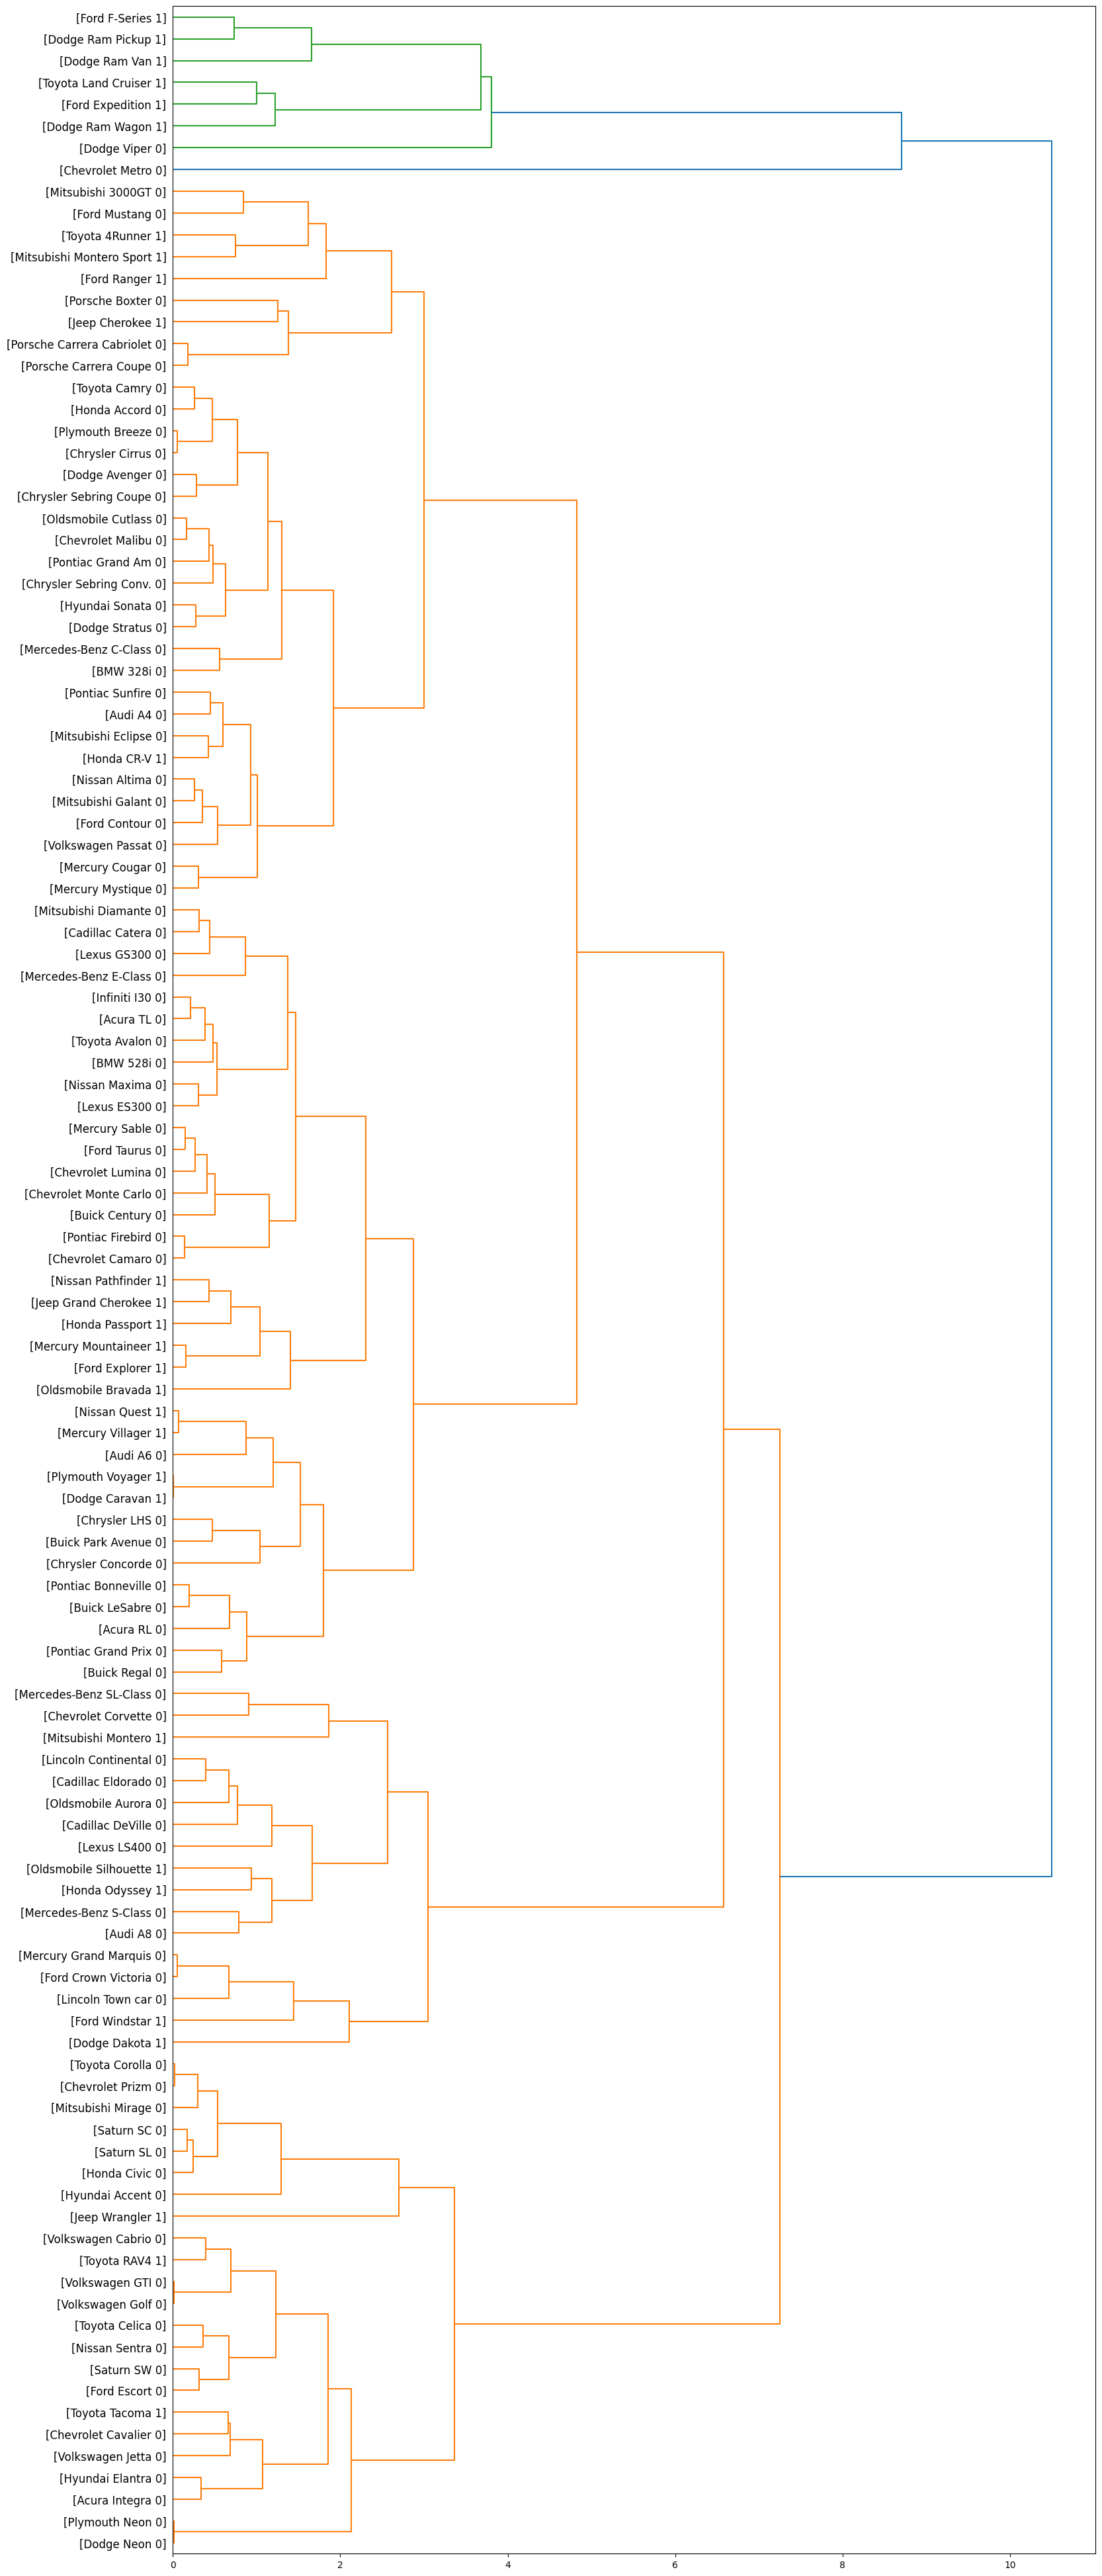

In [8]:
import pylab

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In the next step, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset.

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [9]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/pouya/Documents/Projects/Python/jupyter_notebooks/.venv/lib/python3.13/site-packages/sklearn/cluster/_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [10]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


/tmp/ipykernel_8345/2404335289.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

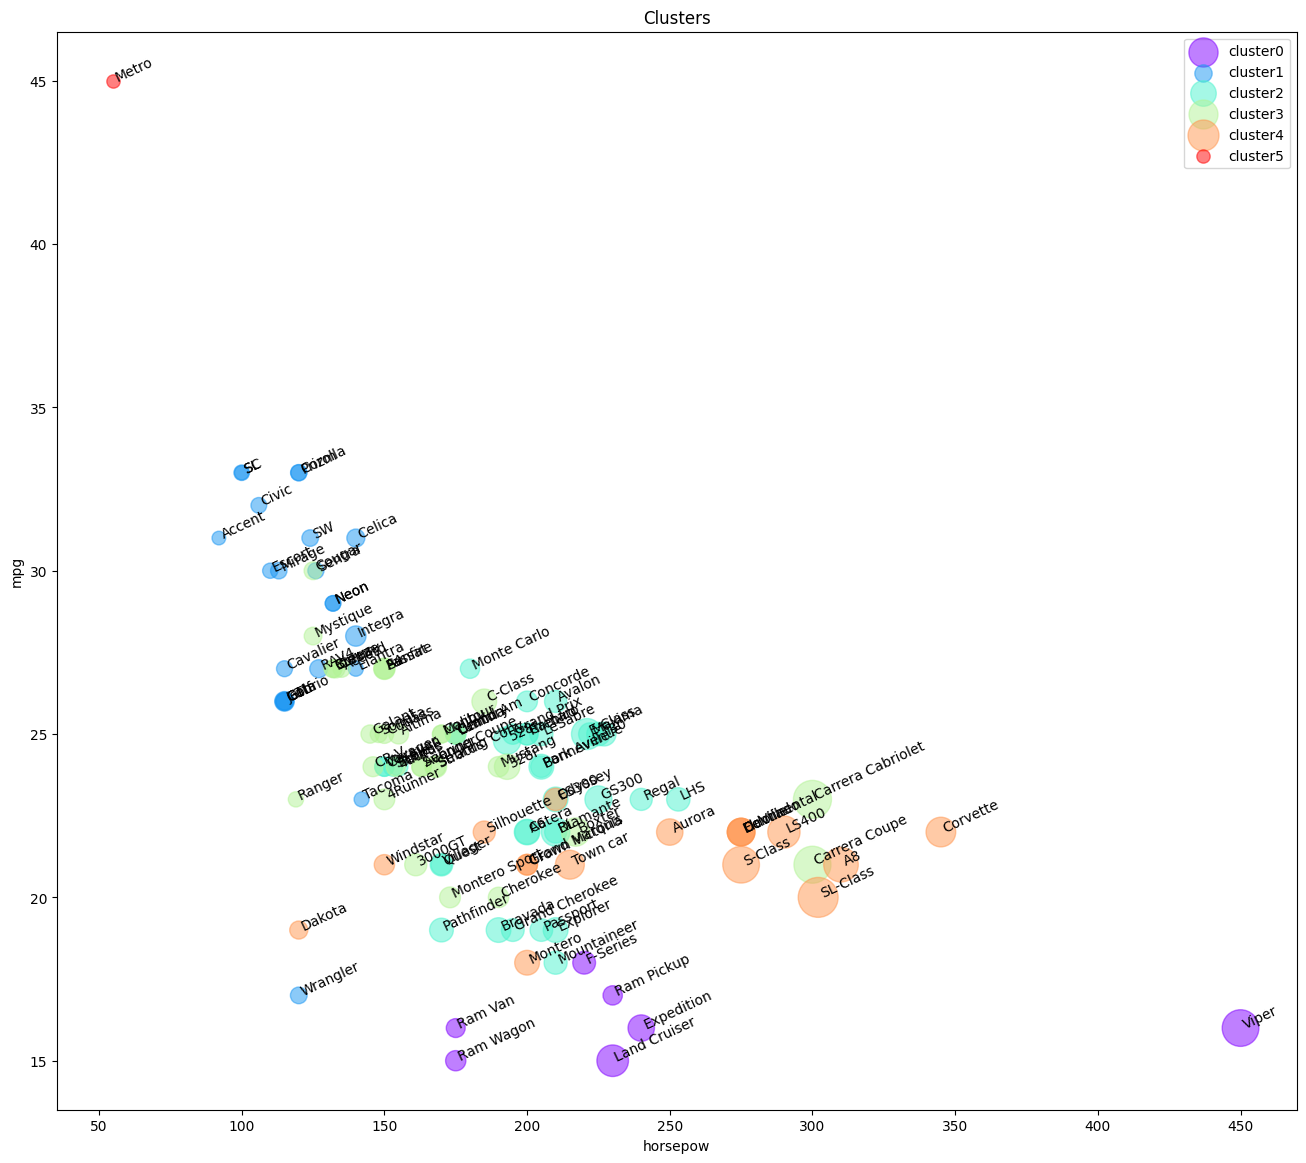

In [13]:
import matplotlib.cm as cm
import numpy as np
from matplotlib import pyplot as plt

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [14]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [15]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

/tmp/ipykernel_8345/840810838.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
/tmp/ipykernel_8345/840810838.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

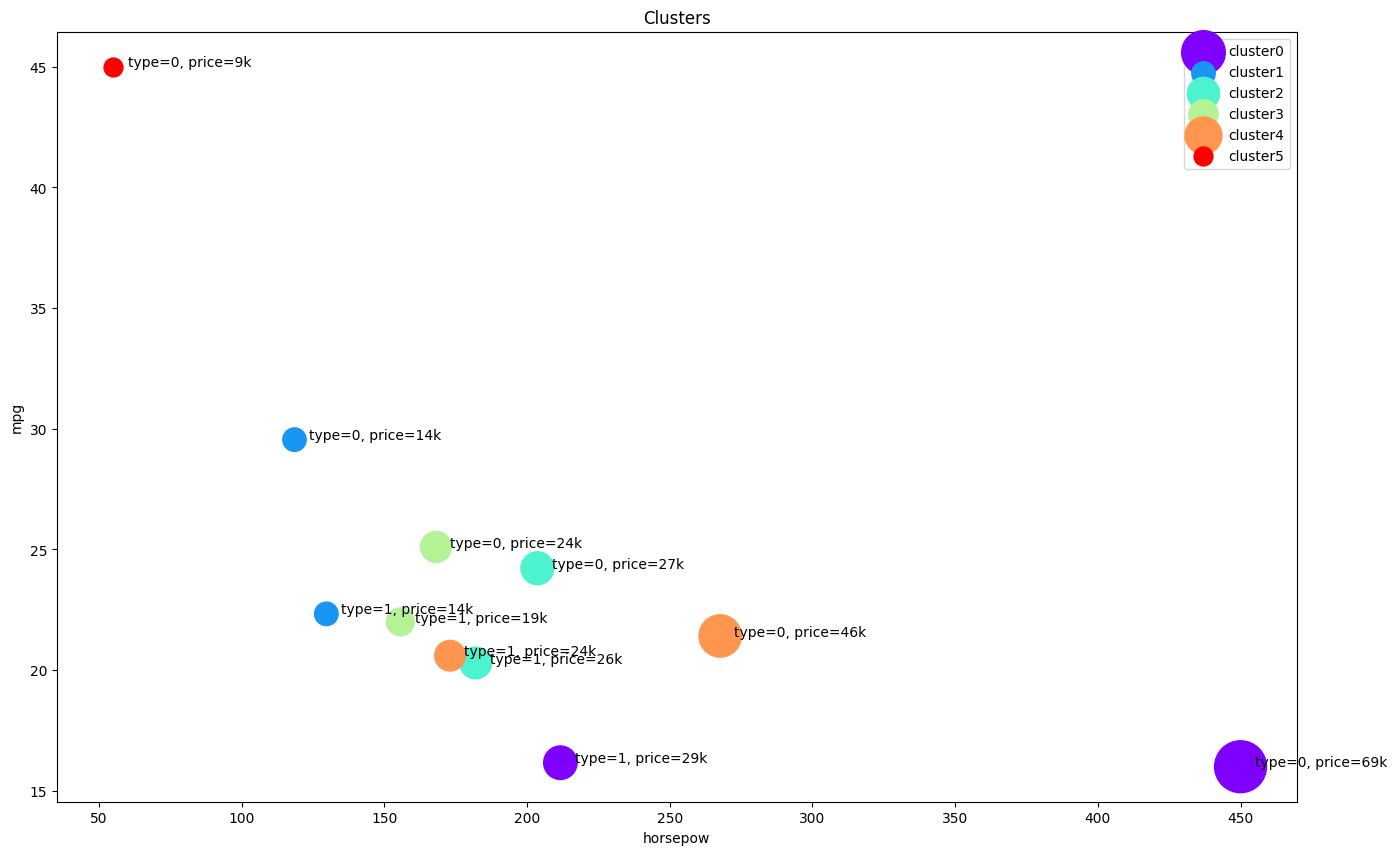

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

That was all about hierarchical. now let's dive into DBSCAN method

# DBSCAN Algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm where clusters can be any shape, not just round, and their sizes can be different.

You see, in an algorithm like K-Means, every single datapoint is forced into a cluster, no matter how far away or out of place it is. DBSCAN thinks differently. It believes that for a point to be part of a cluster, it must be in a "dense" or crowded neighborhood.

DBSCAN classifies every point into one of three types:

*   **Core Point:** A point in the heart of a dense cluster.
*   **Border Point:** A point on the edge of a dense cluster.
*   **Outlier (Noise):** A point that doesn't belong to any dense cluster.

---

 ![](assets/core_border_outlier.png)

---

To decide which type each point is, DBSCAN uses two simple parameters:

*   **`epsilon` (ε):** A distance or radius. This defines the "neighborhood" around each point.
*   **`min_points`:** The minimum number of points required to form a dense region.

Now, we can define the rules for classifying each point:

*   A point is a **Core Point** if it has at least `min_points` neighbors (including itself) within its `epsilon` radius.
*   A point is a **Border Point** if it has fewer than `min_points` neighbors, but it is close enough to be a neighbor of a **Core Point**.
*   If a point is neither a Core nor a Border point, it is considered an **Outlier (Noise)**.

---

![](assets/recognizing_outliers_borders_cores.png)

---

Finally, a cluster is formed by connecting Core points that are neighbors of each other. Any Border point that is a neighbor of one of these Core points becomes part of that same cluster. Outliers, belonging to no cluster, are left alone. no clusterings for them!

Enough theory! Let's dive into the code to see it better.

### Step 1: Import Libraries and Generate Data

First, we'll import the necessary tools and create our dataset. We'll generate 200 data points shaped like two interleaving crescent moons and add some random noise to represent outliers.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# n_samples: The total number of points to generate.
# noise: The standard deviation of Gaussian noise added to the data.
# random_state: Ensures we get the same 'random' points every time we run the code.
X, y = make_moons(n_samples=1000, noise=0.09)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])

df.head()

### Step 2: Visualize the Raw Data

Before we do any clustering, let's look at our data. This helps us understand the challenge. You can clearly see the two "moon" shapes that a simple circular algorithm like K-Means would struggle with.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['feature1'], df['feature2'], c='gray')
plt.title('Raw, Unclustered "Moons" Data', fontsize=16)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Step 3: Set Up and Run the DBSCAN Algorithm

Now, we create an instance of the `DBSCAN` model and fit it to our data. The most important part is choosing the `eps` (epsilon) and `min_samples` parameters. Finding the best values often requires some experimentation.

*   `eps=0.2`: We'll define the neighborhood radius as 0.2.
*   `min_samples=5`: We'll say a point needs at least 5 neighbors to be a Core point.

In [ ]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Fit the model to our data
dbscan.fit(df)

### Step 4: Analyze the Clustering Results

After fitting, the results are stored in the model. The most important attribute is `labels_`, where each point is assigned a cluster ID. DBSCAN uses **-1** to label all the points it considers **outliers (noise)**.

In [ ]:
labels = dbscan.labels_
df['cluster'] = labels

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

df.head()

### Step 5: Visualize the Final DBSCAN Clusters

This is the final and most revealing step. We'll plot the data again, but this time we will color the points according to the cluster they belong to. We will make the noise points small and black to show that they don't belong to any group.

We can also highlight the **Core points** to see the "hearts" of the clusters that DBSCAN identified.

In [ ]:
plt.figure(figsize=(10, 8))

unique_labels = set(labels)

# Define colors for the clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title(f'DBSCAN Clustering | Clusters: {n_clusters_}', fontsize=16)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Conclusion

This report provided a comprehensive introduction to the principles and practices of clustering, a fundamental task in unsupervised machine learning. The primary objective of clustering—to group data by maximizing inter-cluster distance and minimizing intra-cluster distance—was established as the core concept.

We explored three foundational algorithms, each representing a different approach to identifying structure in unlabeled data:

1.  **K-Means:** A fast, centroid-based method ideal for identifying simple, spherical clusters.
2.  **Hierarchical Clustering:** A connectivity-based method that builds a complete hierarchy of clusters, visualized through a dendrogram.
3.  **DBSCAN:** A density-based method with the unique ability to find arbitrarily shaped clusters and effectively identify noise and outliers.


---
### Acknowledgements

I would like to extend my gratitude to **_jadi mirmirani_**, the Tutor of **_Maktabkooneh_** who helped me understand the fundumentals of **_clustering_**.

A huge thanks to Google's Gemini for its assistance in structuring the content, clarifying concepts and providing feedback throughout the preparation of this report.

---

### References

The theoretical concepts and practical code examples in this report were primarily adapted from the following educational resources:

1.  Mirmirani, J. (n.d.). [*آموزش یادگیری ماشین با پایتون (Machine Learning with Python)*](https://maktabkhooneh.org/course/یادگیری-ماشین-پایتون-mk1318) [Online Course]. Maktabkhooneh.
2.  Mirmirani, J. (n.d.). [*machine_learning_with_python_jadi*](https://github.com/jadijadi/machine_learning_with_python_jadi) [Source Code Repository]. GitHub.

---
**Prepared for:**

Dr. Ali Amiri

**Prepared by:**

Pouya Baniadam

(Master Software Engineering at Zanjan university)

**Course:**

**Machine learning**

**Date:**

November 1, 2025